# Probabilidad y distribuciones estadísticas
## Muestras con NumPy

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

El submódulo **random** de **NumPy** ofrece un conjunto de funciones que generan valores aleatorios que pueden provenir de diversas clases de distribuciones estadísticas y brindan un set de datos pertenecientes a los valores del espacio muestral de dichas distribuciones.

En la práctica si requerimos un conjunto de 100 datos que sigan una distribución normal, tendríamos que realizar un llamado a la función normal indicándole la media y el desvío:

```python
    >> media = 0
    >> desvio = 1
    >> numpy.random.normal(media, desvio, 100)
```

Vamos trabajar con datos provenientes de distintas distribuciones (dadas por **numpy.random**). Vamos a emplear una gran cantidad de datos para poder apreciar correctamente el comportamiento estadístico de las variables a partir de visualizaciones. Su forma gráfica constituye una primera aproximación al modelado y/o su predicción. Muchas veces es posible tener una idea de cómo éstos se comportan matemáticamente solo con visualizarlos en un gráfico.

### 1. Distribución uniforme discreta
Se dice que una variable sigue una distribución uniforme discreta (se escribe **_X_ ~ ** _unif_ {$x_1, x_2, ... x_n$}) si la probabilidad de aparicion de los valores en cada ensayo es constante e igual: 

\begin{equation*}
P(x_i)= \dfrac{1}{n}
\end{equation*}

Donde **_P_** es la probabilidad, **_x_** representa los valores dentro del espacio muestral y **_n_** la cantidad de elementos del espacio muestral.

A continuación vamos a realizar un llamado a la función **```randint``` ** que ajusta a valores provenientes de una distribución uniforme discreta, con la motivación de simular el tiro de un dado equilibrado 4.500 veces...

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


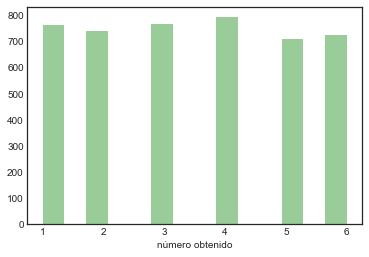

In [16]:
# Definimos el dominio del dado, donde sumamos 1 al valor máximo... ¿por qué?
valor_min = 1
valor_max = 6 + 1

# Definimos la cantidad de lanzamientos del dado.
lanzamientos = 4500

# Hacemos un llamado a la función randint, que devuelve el resultado de cada lanzamiento
np.random.seed(123)
samples_uniforme = np.random.randint(low = valor_min, high = valor_max, size = lanzamientos)

# Graficamos los resultados
eje_x = 'número obtenido'
sns.set_style('white')
sns.distplot(samples_uniforme, axlabel = eje_x, kde=False, color='g' );

In [ ]:
# Definimos el dominio del dado, donde sumamos 1 al valor máximo... ¿por qué?
valor_min = 1
valor_max = 6 + 1

# Definimos la cantidad de lanzamientos del dado.
lanzamientos = 10

# Hacemos un llamado a la función randint, que devuelve el resultado de cada lanzamiento
np.random.seed(123)
samples_uniforme = np.random.randint(low = valor_min, high = valor_max, size = lanzamientos)
samples_uniforme

### 2.Distribución de Bernoulli

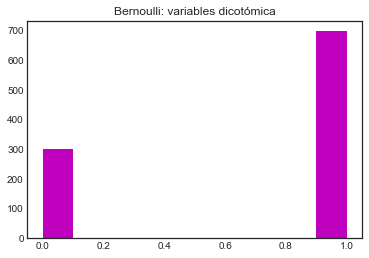

In [18]:
from scipy.stats import bernoulli
bern = bernoulli.rvs(p=0.7, size=1000)

plt.title('Bernoulli: variables dicotómica')
plt.hist(bern, color='m');

### 3. Distribución binomial

Mide el número de éxitos en una secuencia de _**n**_ ensayos independientes entre sí, con una probabilidad fija **_p_** de ocurrencia del éxito entre los ensayos.

Cuando una variable **_X_** sigue una distribución binomial se escribe **_X ~ B (n, p)_** . Donde **_p_** es la probabilidad de éxito (que es fija), y _**n**_ el número de ensayos. 

La función de probabilidad es:

\begin{equation*}
f(x)=  \binom {n}{x} (p)^x (1-p)^{(n-x)}
\end{equation*}

Donde **_x_** es la cantidad de aciertos, **_p_** la probabilidad de éxito, **_n_** la cantidad de ensayos.



En este caso vamos a simular el lanzamiento de una moneda 8 veces por ensayo,  en donde la probabilidad de tener éxito (obtener cara) será de 0,5. A continuación la función de distribución para el caso:

\begin{equation*}
f(x)=  \binom {8}{x} (0,5)^x (1-0,5)^{(8-x)}
\end{equation*}

Vamos a realizar un llamado a la función **```binomial``` ** que ajusta a valores provenientes de una distribución binomial y vamos a realizar 10.000 ensayos para armar la distribución.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


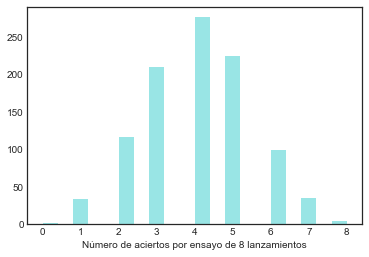

In [4]:
# definimos la cantidad de ensayos.
cantidad_ensayos = 1000

# definimos la cantidad de lanzamientos por ensayo.
lanzamientos = 8

# definimos la probabilidad de obtener cara en cada lanzamiento.
probabilidad_exito = 0.5

# binomial devuelve el número de éxitos de cada vez que se realizo un ensayo de 8 lanzamientos.
samples_binomial = np.random.binomial(n = lanzamientos, p = probabilidad_exito, size = cantidad_ensayos)

# construímos un gráfico.
eje_x = 'Número de aciertos por ensayo de 8 lanzamientos'
sns.distplot(samples_binomial, axlabel = eje_x, kde = False, color='c');

### 4. Distribución de Poisson

La distribución de poisson modela la ocurrencia de un evento sobre un continuo, por ejemplo, el número de clientes que entran a un banco durante la mañana, o la cantidad de fallos de un automovil durante un recorrido...

Esta distribución tiene como parámetro $\lambda$, que siempre es mayor que cero, este parámetro indica el número promedio de ocurrencias de un evento por unidad continua  (como tiempo o espacio).

Cuando una variable **_X_** sigue una distribución de Poisson se escribe **_X ~ Poisson ($\lambda$)_** y la función de probabilidad es:

\begin{equation*}
f(x)= e^{-\lambda} \dfrac{\lambda^x}{x!}
\end{equation*}


Se propone el ejemplo de un tren donde ocurren en promedio 1.5 fallos por día, por lo tanto $\lambda = 1.5 $ y nuestra función de probabilidades: 

\begin{equation*}
f(x)= e^{-1.5} \dfrac{1.5^x}{x!}
\end{equation*}

Vamos a obtener un conjunto de datos provenientes de una distribución de poisson a través del llamado a la función **```poisson```**, con la motivación de modelar el problema presentado.



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


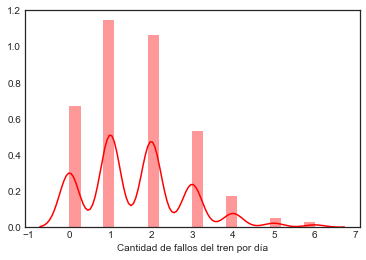

In [20]:
# Definimos los parámetros para la distribucion (no utilizamos la palabra lambda porque se encuentra reservada)
parametro_lambda = 1.5

# Definimos la cantidad de días donde contamos cuantos fallos hubieron.
dias_contados = 365

# poisson devuelve la cantidad de fallos por dia.
samples_poisson = np.random.poisson(lam = parametro_lambda, size = dias_contados)

# construímos el gráfico
eje_x = 'Cantidad de fallos del tren por día'
sns.distplot(samples_poisson, axlabel = eje_x, kde=True, color='red');

### 5. Distribución Exponencial

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


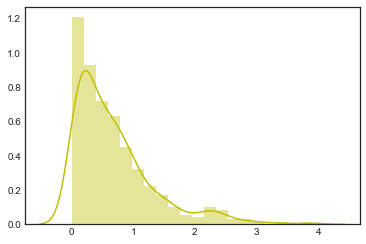

In [6]:
# Heredamos el parámetro lambda y el período de tiempo de la distribución anterior...
parametro_lambda = 1.5
dias_contados = 365

# poisson devuelve la cantidad de fallos por dia.
samples_exp = np.random.exponential(1/parametro_lambda, dias_contados)

# construímos el gráfico
sns.distplot(samples_exp, color='y');

### 6. Distribución Normal

La distribución normal modela una gran cantidad de variables observadas en la naturaleza, como la estatura o peso de una población.

Además en condiciones determidas, algunas distribuciones se comportan como la normal, esto se conoce como el teorema central del límite.

Es posible ajustar una distribución de poisson a una normal cuando $\lambda$ es un valor de gran magnitud: se propone como ejemplo modificar el valor de parametro_lambda a 15, y dias_contados a 3000 en la función de poisson de la celda anterior.

También es posible ajustar una binomial a una distribución normal, para eso se propone como ejemplo agregar el argumento ```fit=stats.norm``` a la construcción del gráfico.

Decimos que una variable aleatoria _**X**_ sigue una distribución normal **_X ~ N ( $\mu$, $\sigma$)_** si su distribución de probabilidades esta dada por:

\begin{equation*}
p(x)= \dfrac{1}{\sqrt{2 \pi \sigma^²}} e^ \dfrac{-(x-\mu)^2}{2 \sigma^2}
\end{equation*}

Supongamos un ejemplo en donde tenemos una población de animales cuyo peso sigue una distribución normal, con $\mu = 342.73 $ kg y $\sigma = 45.78 $ kg

A continuación vamos a tomar un conjunto de muestras que provienen de una distribución normal, llamando a la función ```normal``` de numpy con los parámetros propuestos.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


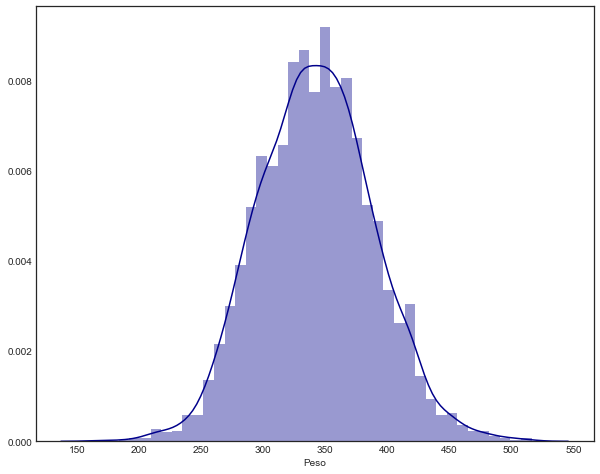

In [7]:
# definimos la media
media = 342.73

# definimos el desvío estandar
desvio_estandar = 45.78

# cantidad de muestras en la población
n_muestras = 3000

# llamamos a la función normal
samples_normal = np.random.normal(loc = media, scale = desvio_estandar, size = n_muestras)

# construímos el gráfico
eje_x = 'Peso'
plt.figure(figsize=(10,8))
sns.distplot(samples_normal, axlabel = eje_x, color='darkblue');